## Read data from Steven Akin's OpenCTD instruments

Steven built two OpenCTDs in the summer of 2021.  He came to WHOI to test them against Seabird 37 CTDs (a trusted oceanographic research quality CTD).  This is to read and plot some of the data.

First read in the SBE37 data from the cal bath.  The fields are as follows:
```
# name 0 = timeJ: Julian Days
# name 1 = tv290C: Temperature [ITS-90, deg C]
# name 2 = cond0S/m: Conductivity [S/m]
# name 3 = sal00: Salinity, Practical [PSU]
# name 4 = prdM: Pressure, Strain Gauge [db]
# name 5 = flag:  0.000e+00
# span 0 = 225.725706, 225.877905                 
# span 1 = 0.1177,    30.2064                 
# span 2 = -0.000194,   0.013056                 
# span 3 = 0.0000,     0.0608                 
# span 4 = -0.120,      0.467                 
# span 5 = 0.0000e+00, 0.0000e+00                 
# interval = seconds: 10
# start_time = Aug 13 2021 17:25:01 [Instrument's time stamp, first data scan]
```

Lines 1-283 of the CNV file are header lines.

The file is here:
"..\data\raw\cal_bath\SBE37SM-RS232_03715360_2021_08_13.cnv"


In [1]:
import numpy as np
import matplotlib as mplt
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import gsw
from scipy.interpolate import interp1d #interpolates a 1-D function; see notes below for additional options

In [2]:
# %matplotlib qt5
%matplotlib inline
plt.rcParams['figure.figsize'] = (6,6)
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 700
plt.close('all')

__figdir__ = '../plots/' 
savefig_args = {'bbox_inches':'tight', 'pad_inches':0.2}
plotfiletype='png'

In [3]:
# fname=r'C:\Users\jtomf\Desktop\access_to_the_sea\info\for_students\Steven_Akin\data\cal_bath\SBE37SM-RS232_03715360_2021_08_13.cnv'
fname=r'..\data\raw\cal_bath\SBE37SM-RS232_03715360_2021_08_13.cnv'

In [4]:
data  = np.genfromtxt(fname, skip_header=285)

In [5]:
np.shape(data)

(1314, 6)

In [6]:
t_JD = data[:,0]
tv290C =  data[:,1]
cond = data[:,2]
sal = data[:,3]
press = data[:,4]

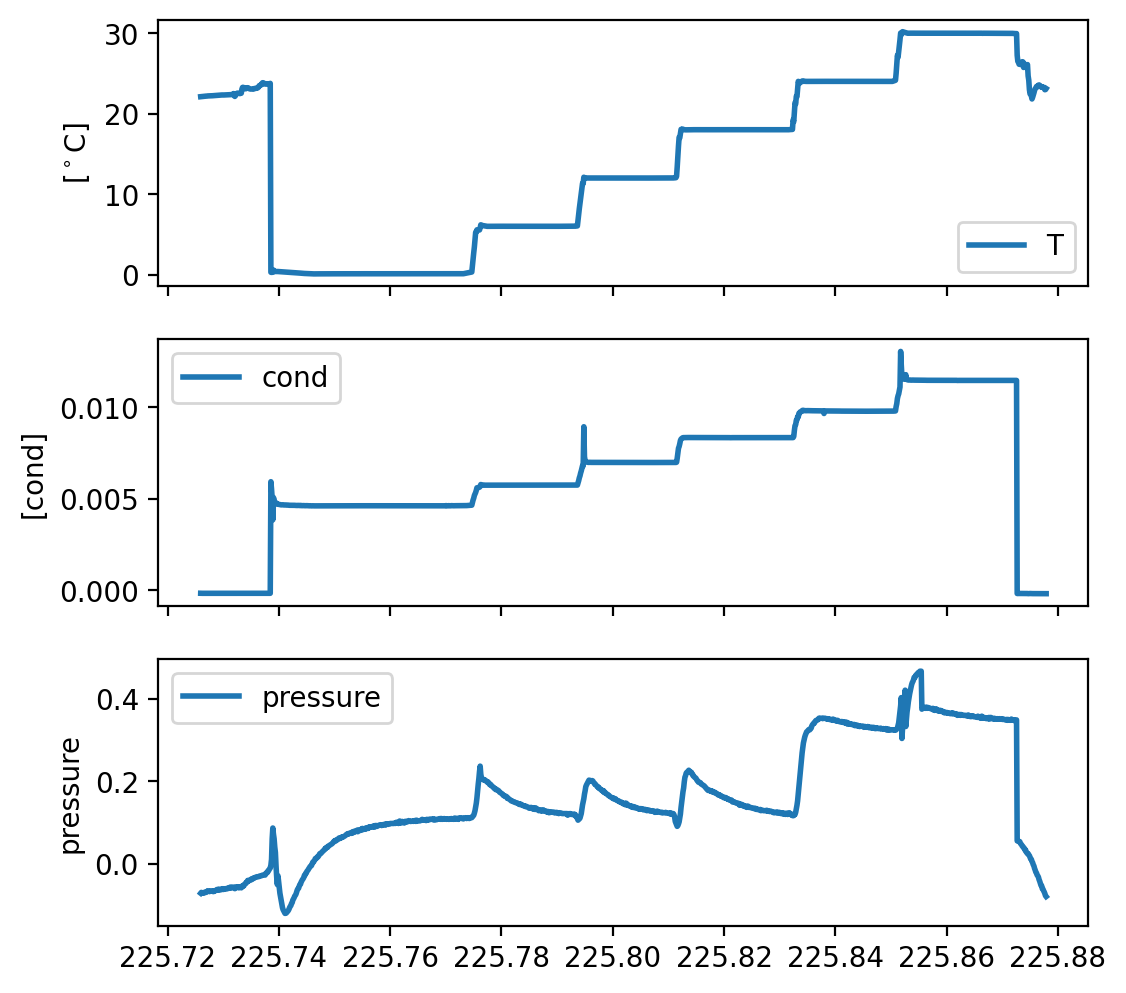

In [7]:
fig, axs = plt.subplots(3, 1, sharex=True)
axs[0].plot(t_JD, tv290C, lw=2)
axs[0].set(ylabel='[$^\circ$C]')
axs[0].legend(['T'])
axs[1].plot(t_JD, cond, lw=2)
axs[1].set(ylabel='[cond]')
axs[1].legend(['cond'])
axs[2].plot(t_JD, press, lw=2)
axs[2].set(ylabel='pressure')
axs[2].legend(['pressure'])

In [8]:
fname=r'..\data\raw\cal_bath\SBE37SM-RS232_03715360_2021_08_13.cnv'
names=['t', 'T', 'cond', 'S', 'P', 'flag']
ds1=pd.read_table(fname, skiprows=285, names=names, delim_whitespace=True)

In [9]:
ds1

,t,T,cond,S,P,flag
0,225.725937,22.1294,-0.000171,0.0,-0.071,0.0
1,225.726053,22.1388,-0.000174,0.0,-0.069,0.0
2,225.726169,22.1467,-0.000174,0.0,-0.070,0.0
3,225.726285,22.1543,-0.000174,0.0,-0.071,0.0
4,225.726400,22.1694,-0.000174,0.0,-0.070,0.0
...,...,...,...,...,...,...
1309,225.877442,23.2976,-0.000191,0.0,-0.065,0.0
1310,225.877558,23.1876,-0.000191,0.0,-0.068,0.0
1311,225.877674,22.9971,-0.000191,0.0,-0.072,0.0
1312,225.877789,23.0168,-0.000191,0.0,-0.077,0.0


In [10]:
# t0 = datetime.datetime('2021-01-01')
'''
for n in np.arange(0,np.size(ds1.t)):
    day = datetime.datetime.fromordinal(int(ds1.t[n]))
    dayfrac = datetime.timedelta(days=ds1.t[n]%1) - datetime.timedelta(days = 366)
    ds1.time[n] = day+dayfrac

#ds1.time=t0+pd.timedelta(ds1.t.values,'D')
'''

"\nfor n in np.arange(0,np.size(ds1.t)):\n    day = datetime.datetime.fromordinal(int(ds1.t[n]))\n    dayfrac = datetime.timedelta(days=ds1.t[n]%1) - datetime.timedelta(days = 366)\n    ds1.time[n] = day+dayfrac\n\n#ds1.time=t0+pd.timedelta(ds1.t.values,'D')\n"

<AxesSubplot:xlabel='t'>

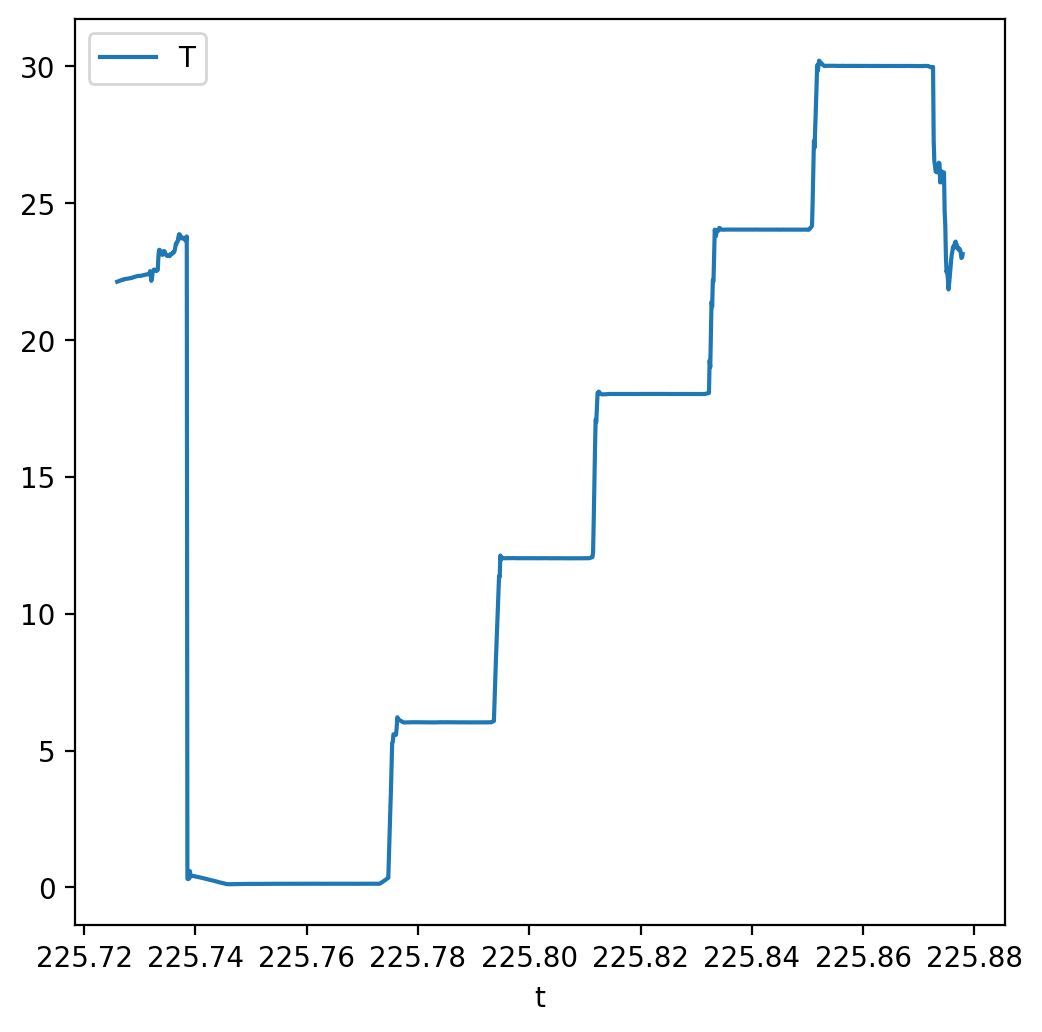

In [11]:
fig = plt.figure()
ax2 = plt.axes()  
ds1.plot('t','T',ax=ax2)

1st 2 lines of OpenCTD data file:

Date, Time,Pressure,Temp A,Temp B,Temp C,Conductivity

08/13/2021,12:32:04,1007.30,23.19,23.44,23.19,

In [12]:
# Load OpenCTD file
fname=r'..\data\raw\cal_bath\LOG001_Copy.CSV'
ds2=pd.read_csv(fname) #,skip_header=1, delimiter=',')

In [13]:
ds2

,Date,Time,Pressure,Temp A,Temp B,Temp C,Conductivity
0,8/13/2021,12:32:05,1007.4,23.19,23.44,23.19,3398.0
1,8/13/2021,12:32:06,1007.4,23.19,23.44,23.19,3401.0
2,8/13/2021,12:32:07,1007.1,23.19,23.44,23.19,3397.0
3,8/13/2021,12:32:08,1007.2,23.19,23.44,23.19,3402.0
4,8/13/2021,12:32:09,1007.2,23.19,23.44,23.19,3404.0
...,...,...,...,...,...,...,...
12868,8/13/2021,16:01:25,1006.0,25.37,25.06,24.87,151.5
12869,8/13/2021,16:01:26,1005.7,25.31,25.00,24.87,217.8
12870,8/13/2021,16:01:27,1005.9,25.31,25.06,24.81,0.0
12871,8/13/2021,16:01:28,1005.9,25.37,25.00,24.87,0.0


C:\Users\Home\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


"\naxs[0].set(ylabel='[$^\\circ$C]')\naxs[0].legend(['T'])\naxs[1].plot(t_JD, cond, lw=2)\naxs[1].set(ylabel='[cond]')\naxs[1].legend(['cond'])\naxs[2].plot(t_JD, press, lw=2)\naxs[2].set(ylabel='pressure')\naxs[2].legend(['pressure'])\n"

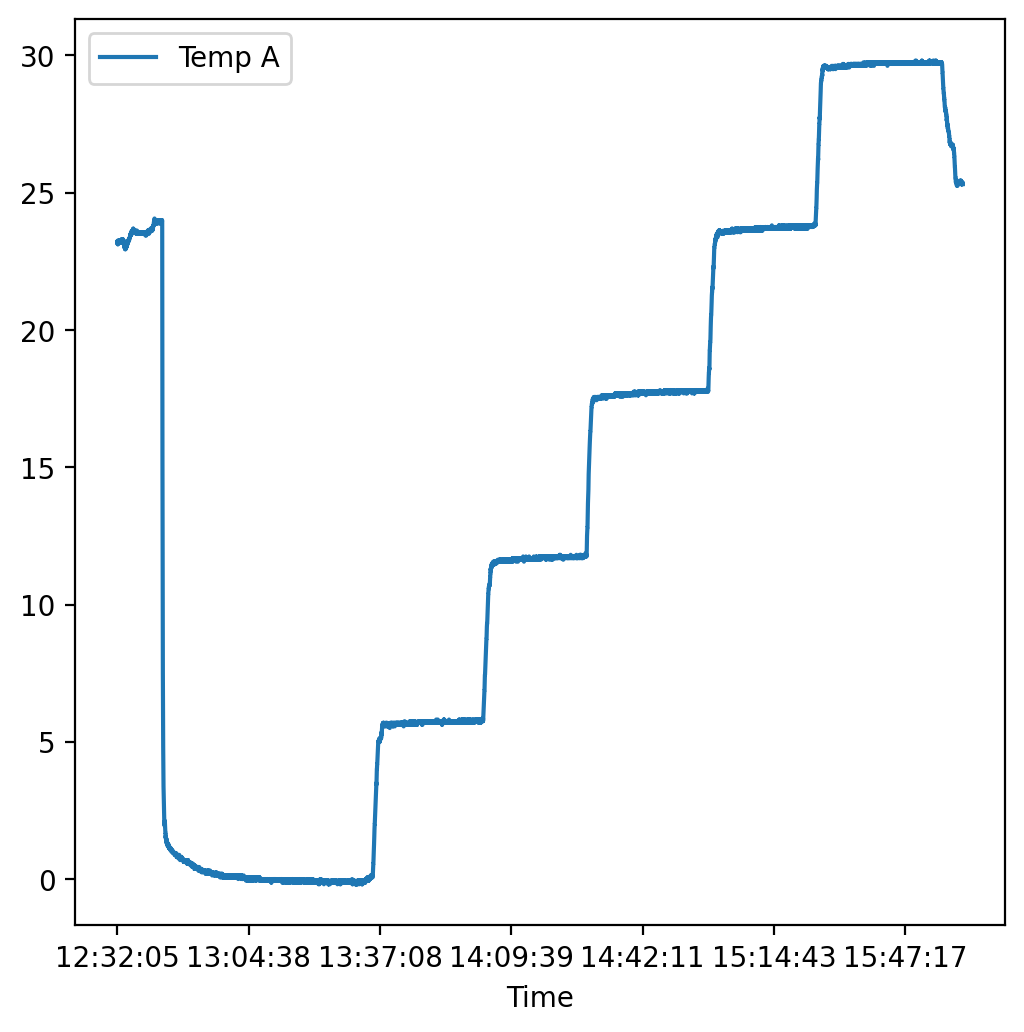

In [14]:
fig = plt.figure()
ax3 = plt.axes()  
ds2.plot('Time','Temp A',ax=ax3)

# plt.plot(ds['Date Time'], ds['Temp A'], lw=2)

'''
axs[0].set(ylabel='[$^\circ$C]')
axs[0].legend(['T'])
axs[1].plot(t_JD, cond, lw=2)
axs[1].set(ylabel='[cond]')
axs[1].legend(['cond'])
axs[2].plot(t_JD, press, lw=2)
axs[2].set(ylabel='pressure')
axs[2].legend(['pressure'])
'''

In [15]:
type(ds2['Time'][0])

str

In [16]:
type(ds2['Date'][0])

str

In [17]:
ds2['Date'][0]

'8/13/2021'

In [18]:
# Time in UTC
# startTime="2021-11-2 00:00 UTC"
endTime="2021-11-5 13:00 UTC"
time_delta=datetime.timedelta(hours=20)

# startTimeDT=datetime.datetime.strptime(startTime, '%Y-%m-%d %H:%M %Z')
endTimeDT=datetime.datetime.strptime(endTime, '%Y-%m-%d %H:%M %Z')
startTimeDT=endTimeDT-time_delta

In [19]:
UTC_time_delta = datetime.timedelta(hours=5)
fine_adjust_time_delta = datetime.timedelta(seconds=5)
ds2timeDT = []
for n in range(0,len(ds2)):
    newtime = datetime.datetime.strptime(ds2['Date'][n]+ ' ' + ds2['Time'][n], '%m/%d/%Y %H:%M:%S')
    ds2timeDT.append(newtime+ UTC_time_delta + fine_adjust_time_delta)

# I think I could do this better with generator or list comprehension:
# [expression> for <var> in <iterable> {if <condition}]

In [20]:
SBE_time0="2021-1-1 00:00 UTC"
SBE_datetime0=datetime.datetime.strptime(SBE_time0, '%Y-%m-%d %H:%M %Z')

ds1timeDT =[]

for t in ds1['t']:
    time_delta=datetime.timedelta(days=t-1)
    ds1timeDT.append(SBE_datetime0+time_delta)

In [21]:
len(ds1['T'])

1314

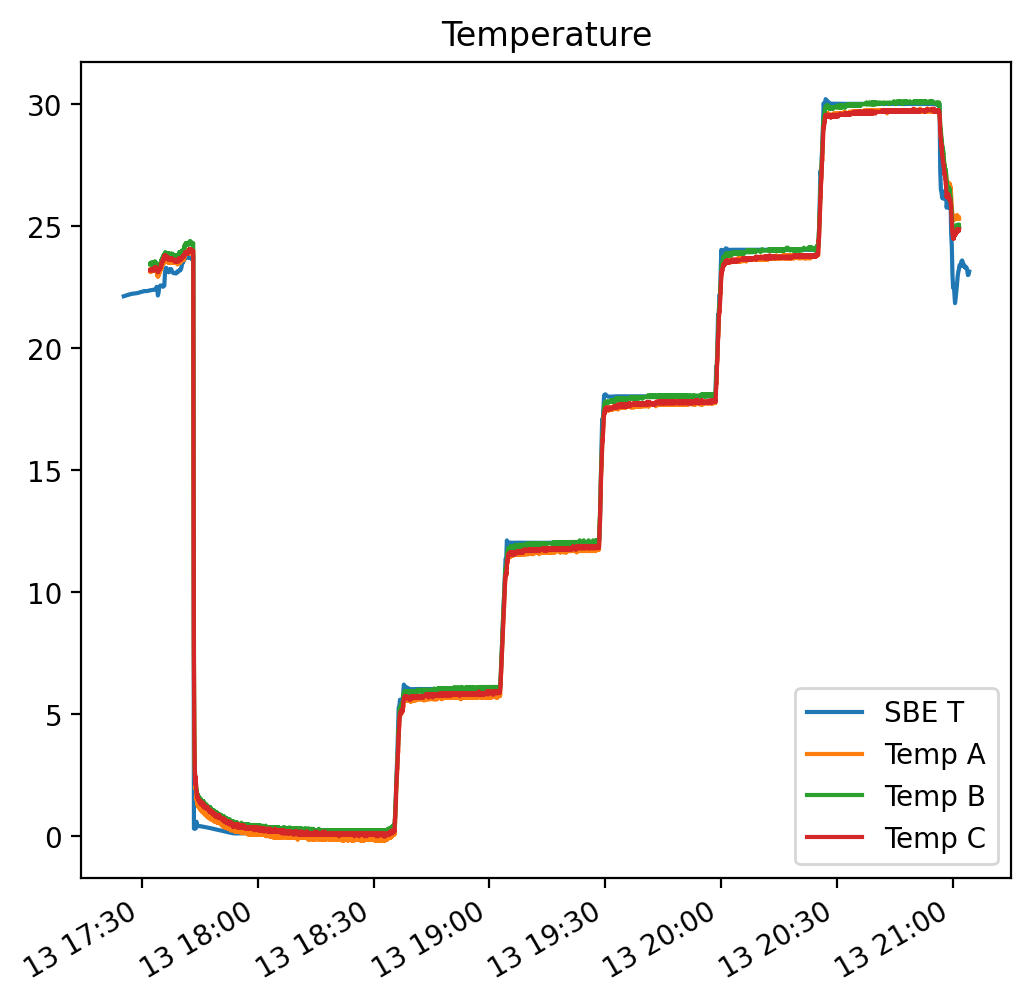

In [22]:
fig = plt.figure()
ax2 = plt.axes()  
ax2.plot(ds1timeDT,ds1['T'])
ax2.plot(ds2timeDT,ds2['Temp A'])
ax2.plot(ds2timeDT,ds2['Temp B'])
ax2.plot(ds2timeDT,ds2['Temp C'])
plt.title('Temperature')
ax2.legend(['SBE T','Temp A','Temp B','Temp C'])
fig.autofmt_xdate()

In [23]:
ds1timeDT[0]-ds2timeDT[0]

datetime.timedelta(days=-1, seconds=85990, microseconds=956800)

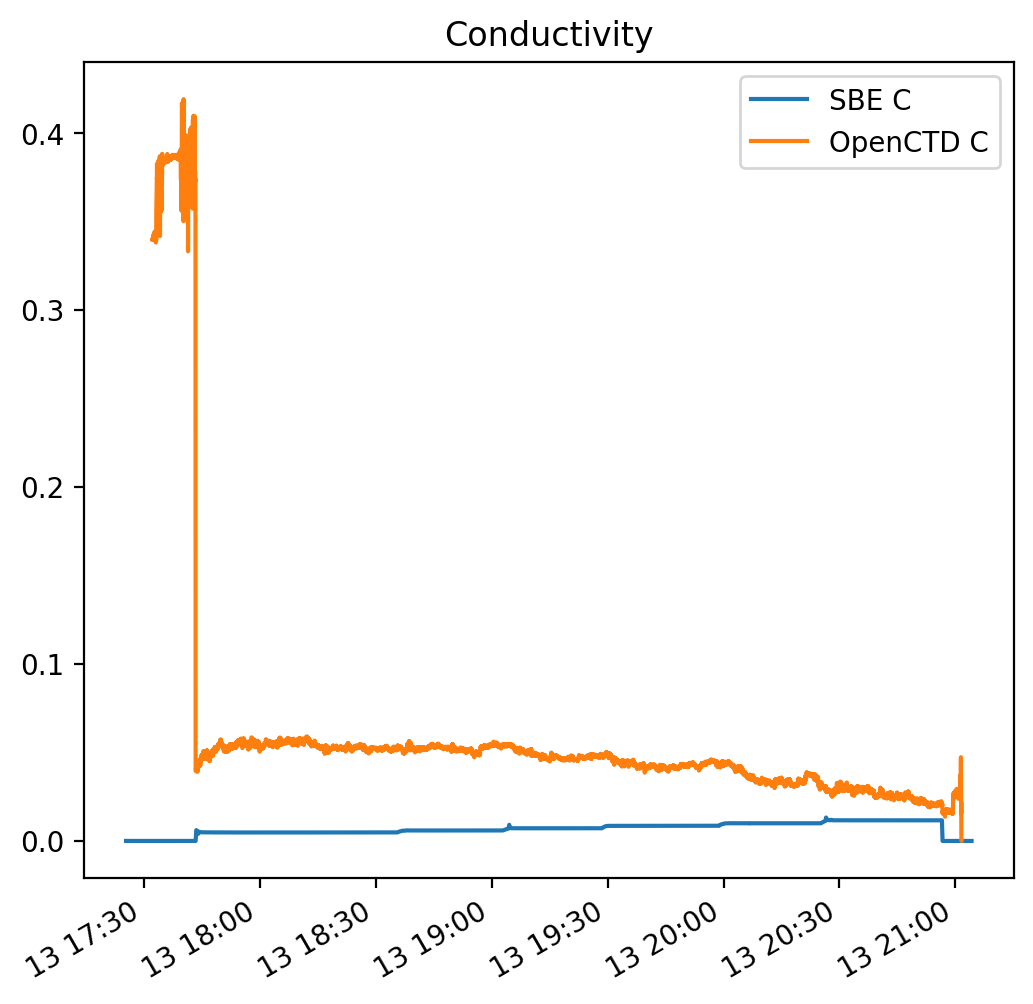

In [24]:
fig = plt.figure()
ax = plt.axes()  
ax.plot(ds1timeDT,ds1['cond'])
ax.plot(ds2timeDT,ds2['Conductivity']/10000)

plt.title('Conductivity')
ax.legend(['SBE C','OpenCTD C'])
fig.autofmt_xdate()

# OK, let's take stock...
1. The conductivity data do not look good-- let's just set that aside.  (The conductivity sensor was "overcalibrated" prior to this deployment, reducing its sensitiivity.)


We want to be able to quantitatively compare the SBE temperature to the OpenCTD temperature.  To do this, we need to:
### - [x] Get their time into common units; that is done one way above; I think this may be another good way to get the time units from the two data sets to be the same:
https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html
https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html (This is the other website John sent Steven in our previous conversation)
"The Julian day number (JDN) is the integer assigned to a whole solar day in the Julian day count starting from noon Universal Time, with Julian day number 0 assigned to the day starting at noon on Monday, January 1, 4713 BC." (https://en.wikipedia.org/wiki/Julian_day#:~:text=The%20Julian%20period%20is%20a,of%20the%20current%20Julian%20Period.)

### - [ ] Interpolate the two onto the same time base
Options:
**1. scipy.interpolate.interp1d**
   a. Interpolates a 1-D function (univariate); can use interp2d for a 2-D grid (multivariate)
   b. Most generic approach
   c. https://docs.scipy.org/doc/scipy-1.8.0/html-scipyorg/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d
   d. Example: https://stackoverflow.com/questions/26517125/combine-two-pandas-dataframes-resample-on-one-time-column-interpolate
   
**2. scipy.interpolate.RectBivariateSpline**
   a. Can be applied over a grid / rectangular mesh (Excel spreadsheet ?)
   b. Approximates, smooths, and interpolates
   c. 1-D array that must be in ascending order (Does this mean it would read data from the bottom of our spreadsheet?)
   d. Weakness: data must be structured (Excel files are structured data, so this shouldn't be an issue)
   e. https://docs.scipy.org/doc/scipy-1.8.0/html-scipyorg/reference/generated/scipy.interpolate.RectBivariateSpline.html#scipy.interpolate.RectBivariateSpline
   
**3. scipy.interpolate.griddata**
   a. Strength: data doesn't have to be structured. (Our data is structured though)
   b. Returns an array of interpolated values
   c. https://docs.scipy.org/doc/scipy-1.8.0/html-scipyorg/reference/generated/scipy.interpolate.griddata.html#scipy.interpolate.griddata

### - [ ] Truncate the two records to the specific times when the comparisons are valid
Options discussed: using an if statement, followed by "dotsell" (? Can't find any documentation on this.)

Note that the SBE record has time units of yearday (or days since the beginning of the year) and the OpenCTD record has units of a pandas 
    